<a href="https://colab.research.google.com/github/Waranika/DCU-EE425-IPA/blob/main/Assignement/Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import data,io,filters, morphology
from skimage import measure, color
from skimage.measure import label, regionprops
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
import matplotlib.patches as mpatches
from skimage.transform import resize
from skimage.util import random_noise
from skimage.filters.rank import mean
from skimage.morphology import square
from skimage.filters.rank import median
from skimage.filters import threshold_otsu
from skimage.filters import gaussian
from skimage.morphology import binary_erosion, binary_dilation, binary_closing, binary_opening, disk

import numpy as np

Import and make sure the image it is binary

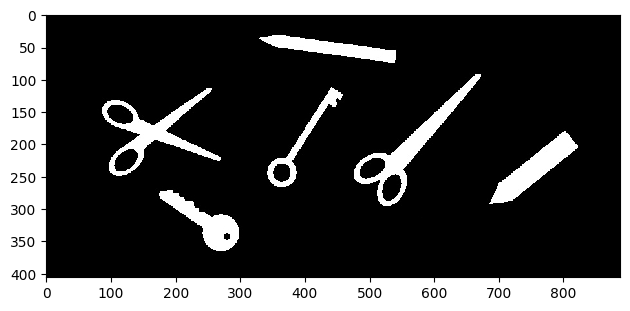

In [2]:
binary = io.imread("scissors2.JPG")
io.imshow(binary)

In [3]:
if binary.ndim > 1 :
  binary = rgb2gray(binary)

threshold_value = threshold_otsu(binary)
binary = binary > threshold_value

To prove idemotency I must use Opening and Closing

In [4]:
#Opening
def Opening(image, size_disk):
  opening = binary_erosion(image, disk(size_disk))
  opening = binary_dilation(opening, disk(size_disk))
  return(opening)
  ### To get visible results at a decent speed the radius of the disk was increased by 5
#Closing
def Closing(image, size_disk):
  closing = binary_dilation(image, disk(size_disk))
  closing = binary_erosion(closing, disk(size_disk))
  return(closing)

Apply opening x times

similar
similar
similar
similar
similar


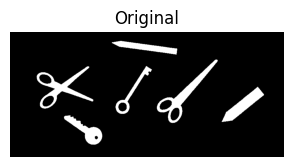

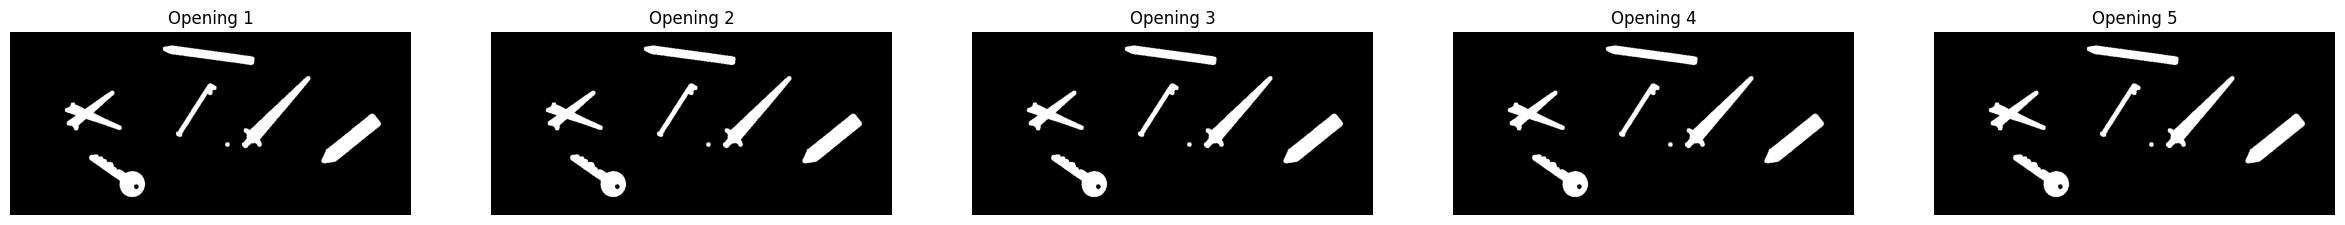

In [5]:
from skimage.morphology.binary import binary_opening
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(binary, cmap='gray')
plt.axis('off')

binary1 =binary.copy()
binary2 =binary.copy()

iterations = 5

fig, ax = plt.subplots(1, iterations, figsize=(30, 10))
for i in range(iterations):
    binary11 = binary1
    binary1 = Opening(binary1, 5)

    if (binary11.all()==binary1.all()):
      print("similar")

    ax[i] = plt.subplot(1, iterations, i+1 )
    plt.title(f'Opening {i + 1}')
    plt.imshow(binary1, cmap='gray')
    plt.axis('off')



plt.show()

Apply closing x times

similar
similar
similar
similar
similar


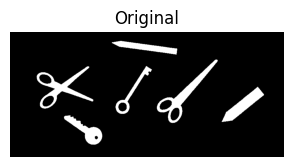

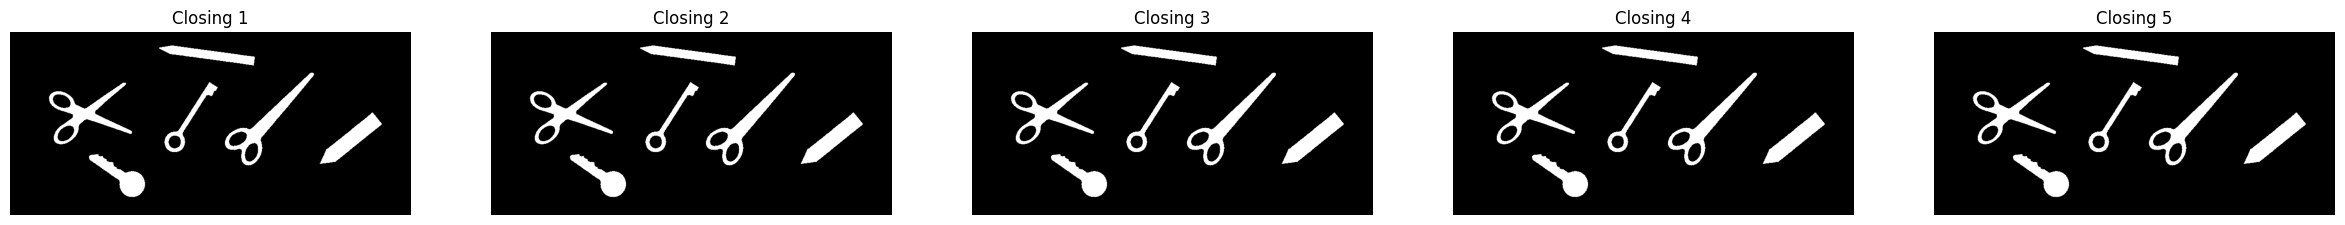

In [6]:
binary_closing,
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(binary, cmap='gray')
plt.axis('off')

iterations = 5

fig, ax = plt.subplots(1, iterations, figsize=(30, 10))
for i in range(iterations):
    binary21 = binary2
    binary2 = Closing(binary2, 5)

    if (binary21.all()==binary2.all()):
      print("similar")

    ax[i] = plt.subplot(1, iterations, i+1 )
    plt.title(f'Closing {i + 1}')
    plt.imshow(binary2, cmap='gray')
    plt.axis('off')

plt.show()

Idempotency says that the complementary of the closing of an image A by B is equal to the opening of the complementary of A by the reflection of B

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


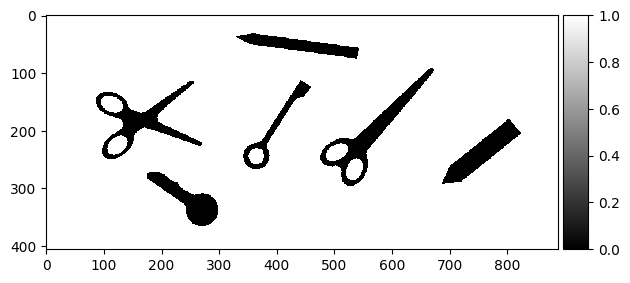

In [7]:
binary3 = binary.copy()
binary3 = Closing(binary3, 10)
binary3 = 1 - binary3
io.imshow(binary3, cmap='gray')

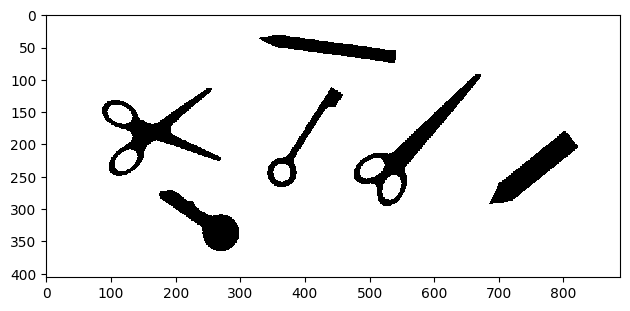

In [8]:
binary4 = binary.copy()
binary4 = 1 - binary4
binary4 = Opening(binary4, 10)
io.imshow(binary4, cmap='gray')

In [9]:
if (binary4.all()==binary3.all()):
      print("similar")

similar
